<a href="https://colab.research.google.com/github/barsukpolina/Bayesian-networks/blob/main/DM_HW3_PolinaBarsuk_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ДЗ №3. Практика по БС

In [ ]:
!pip install pomegranate

In [ ]:
from pomegranate import *

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
from pygraphviz import *

In [ ]:
def plot_bn(df, bn):
  for i in range(df.shape[1]):
    bn.states[i].name = df.columns[i]
  plt.figure(figsize = (10,10))
  return bn.plot()

### Фильтрация данных




In [ ]:
import csv
insurance = pd.read_csv("insurance.csv", dtype = str, quoting=csv.QUOTE_NONE)

Поскольку я в данных выделила 4 группы признаков, то для сокращения я из каждой группы выберу 2-4 признака, чтобы не потерять полноту информации о водителе и машине. Эти признаки выделены синим цветом. 

*Характеристики водителя:*

**GoodStudent (good student):** False and True.

**Age (age):** Adolescent, Adult and Senior.

<font color='blue'> *SocioEcon (socio-economic status): levels Prole, Middle, UpperMiddle and Wealthy.* </font>

<font color='blue'> *RiskAversion (risk aversion): levels Psychopath, Adventurous, Normal and Cautious.*</font>

**MedCost (cost of the medical treatment):** levels Thousand, TenThou, HundredThou and Million.

<font color='blue'> *DrivQuality (driving quality): levels Poor, Normal and Excellent.* </font>

<font color='blue'> *DrivingSkill (driving skill): levels SubStandard, Normal and Expert.* </font>

**SeniorTrain (senior training):** False and True. Что-то с навыками вождения

**DrivHist (driving history):** levels Zero, One and Many.

**HomeBase (neighbourhood type):** levels Secure, City, Suburb and Rural.

**OtherCarCost (costs for the other car):** levels Thousand, TenThou, HundredThou and Million.

------------------------------------------------------

*Характеристики машины по функционалу:*

<font color='blue'> *VehicleYear (vehicle age): levels Current and older.* </font>

<font color='blue'> *MakeModel (car's model): levels SportsCar, Economy, FamilySedan, Luxury and SuperLuxury.* </font>

**Cushioning (cushioning):** levels Poor, Fair, Good and Excellent.

**RuggedAuto (ruggedness of the car):** levels EggShell, Football and Tank.

**Mileage (mileage):** levels FiveThou, TwentyThou, FiftyThou and Domino.

<font color='blue'> *Antilock (ABS): False and True.* </font>

**AntiTheft (anti-theft system):** False and True.

<font color='blue'> *Airbag (airbag): False and True.* </font>

------------------------------------------------------

*Характеристики машины по предыдущей истории пользования:*

<font color='blue'> *ThisCarDam (damage to this car): levels None, Mild, Moderate and Severe.* </font>

<font color='blue'> *Accident (severity of the accident): levels None, Mild, Moderate and Severe.* </font>

**Theft (theft):** False and True.

**OtherCar (other cars involved in the accident):** False and True.

------------------------------------------------------
*Цена машины, оцененная разными способами:*

<font color='blue'> *ThisCarCost (costs for the insured car): levels Thousand, TenThou, HundredThou and Million.Стоимость по страховке* </font>

<font color='blue'> *CarValue (value of the car): levels FiveThou, TenThou, TwentyThou, FiftyThou and Million.*</font>

**PropCost (ratio of the cost for the two cars):** a four-level factor with levels Thousand, TenThou, HundredThou and Million.

**ILiCost (inspection cost):** levels Thousand, TenThou, HundredThou and Million.











При выборе признаков для дальнейшего их исследования я придерживалась следующей логики:<br>
1. из характеристик водителя я выбрала такие признаки как социально-экономический статус, тип личности (рискованный, осторожный и т.д.), опыт и качество вождения. Остальные признаки я посчитала прямым следствием из тех, что я выделила. Интересно посмотреть, влияет ли социально-экономический статус и тип личности на цену машины от страховой компании.
2. из характеристик машины по функционалу я выбрала год машины, ее статус (люкс, спортивная и т.д.), наличие таких функций как антиблокировочная система тормозная система и наличие/отсутствие подушки безопасности. Мне интересно посмотреть, как отсутствие/наличие подушки безопасности и антиблокировочной тормозной системы влияют на цену машины. 
3. из характеристик машины по предыдущей истории использования были выбраны следующие: попадание в аварию, серьзность аварии, если она была. 
4. в качестве целевых переменных были выбраны цена машины, оцененная страховой компанией, и обычная цена машины. 

Также хочется посмотреть, как все эти признаки в совокупности влияют на цену машины, установленную страховой компанией.

Выбираю случайно 2000 наблюдений.

In [ ]:
insuranceCut = insurance[['"SocioEcon"', '"RiskAversion"', '"DrivQuality"', '"DrivingSkill"', '"VehicleYear"',
                          '"MakeModel"', '"Antilock"', '"Airbag"', '"ThisCarDam"', '"Accident"', '"ThisCarCost"',
                          '"CarValue"']].sample(n=2000, random_state=1)
insuranceCut.head()

,"""SocioEcon""","""RiskAversion""","""DrivQuality""","""DrivingSkill""","""VehicleYear""","""MakeModel""","""Antilock""","""Airbag""","""ThisCarDam""","""Accident""","""ThisCarCost""","""CarValue"""
11456,"""UpperMiddle""","""Cautious""","""Normal""","""Normal""","""Current""","""FamilySedan""","""False""","""True""","""None""","""None""","""Thousand""","""TwentyThou"""
16528,"""Prole""","""Normal""","""Normal""","""Normal""","""Older""","""Economy""","""False""","""False""","""None""","""None""","""Thousand""","""TenThou"""
3253,"""Middle""","""Cautious""","""Excellent""","""Expert""","""Older""","""SportsCar""","""False""","""False""","""None""","""None""","""Thousand""","""TwentyThou"""
18614,"""Middle""","""Normal""","""Poor""","""SubStandard""","""Older""","""FamilySedan""","""False""","""False""","""Severe""","""Severe""","""TenThou""","""TenThou"""
1544,"""Middle""","""Normal""","""Normal""","""Normal""","""Older""","""Economy""","""False""","""False""","""None""","""None""","""Thousand""","""TenThou"""


То есть всего 2000 наблюдей и 12 признаков. 

In [ ]:
insuranceCut.shape

(2000, 12)

### Построение Байесовской сети

#### Greedy algorithm

In [ ]:
bnet1 = BayesianNetwork.from_samples(insuranceCut, algorithm='greedy')

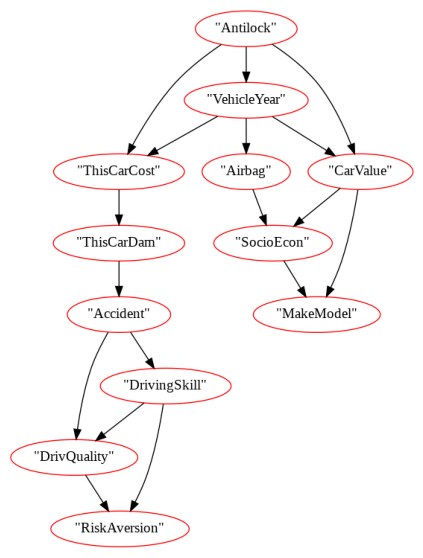

In [ ]:
plot_bn(insuranceCut, bnet1)

#### Chow-liu algorithm

In [ ]:
bnet2 = BayesianNetwork.from_samples(insuranceCut, algorithm='chow-liu')

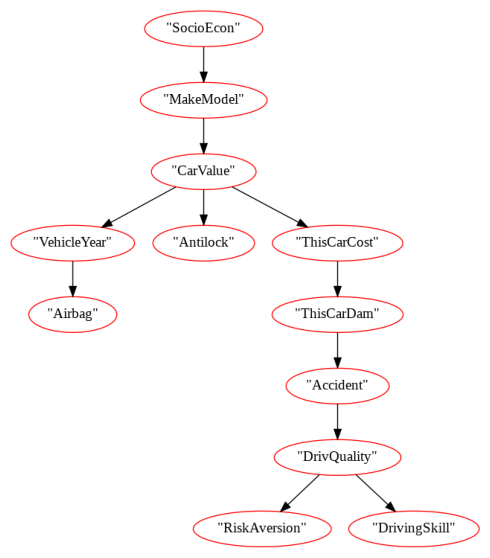

In [ ]:
plot_bn(insuranceCut, bnet2)

#### Exact-dp algorithm

In [ ]:
bnet3 = BayesianNetwork.from_samples(insuranceCut, algorithm='exact-dp')

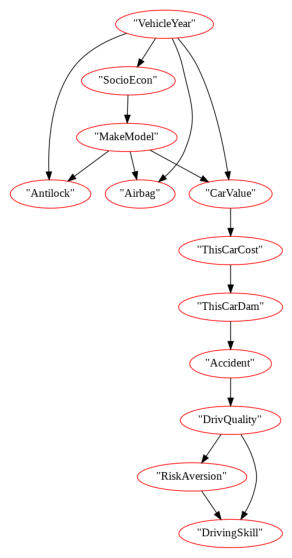

In [ ]:
plot_bn(insuranceCut, bnet3)

### Сравнение полученных моделей

Чем ближе Log_probability к 0, тем лучше.


In [ ]:
insuranceCut_array = insuranceCut.to_numpy()

In [ ]:
print('Log_probability(Greedy algorithm) = ', bnet1.log_probability(insuranceCut_array).sum())

Log_probability(Greedy algorithm) =  -13752.550961367502


In [ ]:
print('Log_probability(Chow-liu algorithm) = ', bnet2.log_probability(insuranceCut_array).sum())

Log_probability(Chow-liu algorithm) =  -14081.908804276716


In [ ]:
print('Log_probability(Exact-dp algorithm) = ', bnet3.log_probability(insuranceCut_array).sum())

Log_probability(Exact-dp algorithm) =  -13405.517466054804


***Вывод:*** Таким образом, лучшим из построенных является алгоритм Exact-dp, далее идет Greedy, а потом Chow-liu.

При анализе полученных графов поняла, что они получились совершенно разными. В первой модели цена машина от страховой компании и просто цена машины никак не связаны, но во второй и третьей моделях первая цена и вторая ассоциативно связаны. Вообще структуры, построенные с помощью exact-dp и chow-liu, довольно-таки похожи, но вот построенная с помощью greedy алгоритма сильно отличается.

### Примеры вывода

Посмотрим на изменение переменной *ThisCarCost* (цена машина от страховой компании) при варьировании других параметров. 

В качестве лучшей модели выбрана модель bnet3 (алгоритм exact-dp).

Первоначальное распределение: 

In [ ]:
initial_proba = bnet3.predict_proba([[None] * insuranceCut.shape[1]])

Первоначальное распределение переменной *ThisCarCost*:<br>
больше всего машин оценено на цену Thousand (82%), 13% - TenThou, и оставшиеся 5% распределены среди HundredThou и Million.


In [ ]:
initial_proba[0][10].parameters

[{'"HundredThou"': 0.04812266028488259,
  '"Million"': 0.0004455730598675445,
  '"TenThou"': 0.13233243722056554,
  '"Thousand"': 0.8190993294346844}]

In [ ]:
bnet3.bake()

1. Если в машине присутствует подушка безопасности и антиблокировочная тормозная система, то вероятность, что машину оценят в Thousand увеличивается в сравнении с первоначальным распределением, а именно: 86% (увеличивается на 4%). Также в сравнении с изначальным распределением тут немного увеличилась вероятность оценки машины в стоимость Million (теперь она 0.13%, а была 0.04%) и в HundredThou (теперь 13%, а было 5%), однако вероятность в TenThou уменьшилась. То есть все показатели увеличились кроме TenThou.

То есть еще более вероятно, что машину оценят в Thousand.

In [ ]:
bnet3.predict_proba([[None, None, None, None, None, None, '"True"', '"True"', None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.1288720743928603,
  '"Million"': 0.0012799683664880413,
  '"TenThou"': 0.012690162649460119,
  '"Thousand"': 0.8571577945911916}]

А если в машине отсутствуют и подушка безопасности, и антиблокировочная тормозная система, то вероятность получить оцененную цену в  Thousand уменьшается, 80%(уменьшилось на 2%), а в Million уменьшилась вероятность на 0.01%, однако вероятность оценки машины в TenThou стала 19% (что больше первоначального распределения на 6%). И это довольно странно, почему при отсутствии этих приспособлений поднимается вероятность бОльшей цены, чем минимальная?

In [ ]:
bnet3.predict_proba([[None, None, None, None, None, None, '"False"', '"False"', None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.014502741196658486,
  '"Million"': 0.0003655786005966272,
  '"TenThou"': 0.18526420909465346,
  '"Thousand"': 0.7998674711080913}]

2. Если социальный статус выше среднего или богатый, а тип личности - развлекательный, то цена от страховой компании изменится следующим образом: вероятнее всего цена будет также Thousand (но с вероятностью на 2% меньше первоначального варианта, 80%), а дальше по убыванию будут идти HundredThou и TenThou, 16% и 5% соответственно. Но для богатого человека стоит отметить, что вероятность цены в Million увеличивается, 3%, в сравнении с другими распределениями, когда как у человека со статусом выше среднего эта вероятность равна 0.06%.

In [ ]:
bnet3.predict_proba([['"UpperMiddle"', '"Adventurous"', None, None, None, None, None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.15523725125457274,
  '"Million"': 0.0006276813924249331,
  '"TenThou"': 0.05224838724156359,
  '"Thousand"': 0.7918866801114387}]

In [ ]:
bnet3.predict_proba([['"Wealthy"', '"Adventurous"', None, None, None, None, None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.16499242110819784,
  '"Million"': 0.025261286995934256,
  '"TenThou"': 0.02048196607526087,
  '"Thousand"': 0.789264325820607}]

Но если социальный статус средний, а тип личности "Psychopath", то самой вероятной ценой будет Thousand, но уже с намного меньшей вероятностью, 67%, а вероятность оценки в TenThou - 23%, что довольно странно, то есть вероятность цены бОльшей, чем минимальная, стала больше, если тип личности психопат, а социальный уровень средний.

In [ ]:
bnet3.predict_proba([['"Middle"', '"Psychopath"', None, None, None, None, None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.09112381207560692,
  '"Million"': 0.000724725023403694,
  '"TenThou"': 0.23718447785075827,
  '"Thousand"': 0.6709669850502311}]

3. Если год машины текущий, а ее статус - спортивная, то распределение цены от страховой компании меняется следующим образом: самой вероятной ценой становится Thousand (85%), правда эта сумма была вероятней всего и в изначальном распределении, но затем по вероятности идет уже HundredThou, что уже отличается (13%). Но стоит обратить внимание, что при изменении типа машины на любой другой тип распределение разительно изменяется. Так, если выбрать машины люкс-класса, то единственными вариантами, как ее могут оценить: это Thousand (тут вероятность очень высокая - 87%) и HundredThou (13%). 

In [ ]:
bnet3.predict_proba([[None, None, None, None, '"Current"', '"SportsCar"', None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.13468264617921277,
  '"Million"': 0.0020325203252037492,
  '"TenThou"': 0.012798313556863795,
  '"Thousand"': 0.8504865199387197}]

In [ ]:
bnet3.predict_proba([[None, None, None, None, '"Current"', '"Luxury"', None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.1277777777777781,
  '"Million"': 0.0,
  '"TenThou"': 0.0,
  '"Thousand"': 0.8722222222222216}]

У старых машин обнаруживается другая закономерность. У машин типа люкс-класса уменьшается вероятность у цены Thousand, 85%, и в миллион также невозможно ее оценить. А у старых спортивных машин увеличивается вероятность оценить ее в TenThou, 14%, но уменьшается в Thousand, 82%.

In [ ]:
bnet3.predict_proba([[None, None, None, None, '"Older"', '"SportsCar"', None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.03749861070249461,
  '"Million"': 0.0030303030303035234,
  '"TenThou"': 0.14021200577872636,
  '"Thousand"': 0.8192590804884755}]

In [ ]:
bnet3.predict_proba([[None, None, None, None, '"Older"', '"Luxury"', None, None, None, None, None, None]])[0][10].parameters

[{'"HundredThou"': 0.10592387116658988,
  '"Million"': 0.0,
  '"TenThou"': 0.043897804616507705,
  '"Thousand"': 0.8501783242169021}]

Стоит отметить, что во всех примерах самая вероятная цена остается неизменной, Thousand, меняется лишь немного ее процент. Например, в моих примерах он был получен самый высокий при типе машины Luxury и годе выпуска - Current.

4. Посмотрим, какое вообще будет распределение при всех конкрентных параметрах, кроме ThisCarCost:

С таким распределением у нас большинство машин, 99% оценены в Thousand.

In [ ]:
bnet3.predict_proba([['"UpperMiddle"', '"Adventurous"', '"Normal"', '"Normal"', '"Older"', '"SportsCar"', '"True"', '"True"', '"None"', '"None"', None, '"TwentyThou"']])[0][10].parameters

[{'"HundredThou"': 0.0019666549328567103,
  '"Million"': 0.0,
  '"TenThou"': 1.9481572778953318e-05,
  '"Thousand"': 0.9980138634943643}]

### *Качество предсказаний

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = insuranceCut['"ThisCarCost"']

In [ ]:
X = insuranceCut.drop(columns='"ThisCarCost"')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
Xy_train = X_train.copy()
Xy_train['"ThisCarCost"'] = y_train

In [ ]:
Xy_train.head()

,"""SocioEcon""","""RiskAversion""","""DrivQuality""","""DrivingSkill""","""VehicleYear""","""MakeModel""","""Antilock""","""Airbag""","""ThisCarDam""","""Accident""","""CarValue""","""ThisCarCost"""
183,"""Prole""","""Normal""","""Normal""","""Normal""","""Older""","""SportsCar""","""True""","""False""","""None""","""None""","""FiftyThou""","""Thousand"""
17563,"""UpperMiddle""","""Normal""","""Normal""","""Normal""","""Current""","""FamilySedan""","""True""","""True""","""None""","""None""","""TwentyThou""","""Thousand"""
2052,"""UpperMiddle""","""Cautious""","""Normal""","""Normal""","""Older""","""SportsCar""","""False""","""False""","""None""","""None""","""FiveThou""","""Thousand"""
15085,"""Prole""","""Normal""","""Normal""","""Normal""","""Older""","""FamilySedan""","""False""","""False""","""None""","""None""","""FiveThou""","""Thousand"""
2320,"""Prole""","""Adventurous""","""Poor""","""SubStandard""","""Older""","""Economy""","""False""","""False""","""Moderate""","""Moderate""","""FiveThou""","""TenThou"""


In [ ]:
model = BayesianNetwork.from_samples(Xy_train, algorithm='exact-dp')

In [ ]:
model.bake()

Подготовим тестовые данные для предсказывания:

In [ ]:
Xy_test = X_test.copy()
Xy_test['"ThisCarCost"'] = None

In [ ]:
predicted_df = pd.DataFrame(model.predict(Xy_test.to_numpy()))
predicted_df.columns = Xy_train.columns.values

In [ ]:
predicted_df['"ThisCarCost_real"'] = y_test.values

In [ ]:
predicted_df

,"""SocioEcon""","""RiskAversion""","""DrivQuality""","""DrivingSkill""","""VehicleYear""","""MakeModel""","""Antilock""","""Airbag""","""ThisCarDam""","""Accident""","""CarValue""","""ThisCarCost""","""ThisCarCost_real"""
0,"""Prole""","""Normal""","""Normal""","""Normal""","""Older""","""Economy""","""False""","""False""","""None""","""None""","""FiveThou""","""Thousand""","""Thousand"""
1,"""Middle""","""Normal""","""Excellent""","""Expert""","""Older""","""FamilySedan""","""False""","""False""","""None""","""None""","""FiveThou""","""Thousand""","""Thousand"""
2,"""Middle""","""Cautious""","""Normal""","""Normal""","""Older""","""FamilySedan""","""False""","""False""","""None""","""None""","""TwentyThou""","""Thousand""","""Thousand"""
3,"""Prole""","""Adventurous""","""Poor""","""SubStandard""","""Older""","""FamilySedan""","""False""","""False""","""Severe""","""Severe""","""TenThou""","""TenThou""","""TenThou"""
4,"""Prole""","""Adventurous""","""Excellent""","""Expert""","""Older""","""Economy""","""False""","""False""","""None""","""None""","""FiveThou""","""Thousand""","""Thousand"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,"""Middle""","""Cautious""","""Normal""","""Normal""","""Current""","""SportsCar""","""True""","""True""","""None""","""None""","""TenThou""","""Thousand""","""Thousand"""
663,"""Middle""","""Normal""","""Poor""","""SubStandard""","""Older""","""FamilySedan""","""False""","""False""","""None""","""None""","""TwentyThou""","""Thousand""","""Thousand"""
664,"""Middle""","""Cautious""","""Excellent""","""Normal""","""Older""","""FamilySedan""","""False""","""True""","""None""","""None""","""FiveThou""","""Thousand""","""Thousand"""
665,"""Middle""","""Cautious""","""Poor""","""SubStandard""","""Older""","""Economy""","""False""","""False""","""None""","""None""","""FiveThou""","""Thousand""","""Thousand"""


In [ ]:
comparison_column = np.where(predicted_df['"ThisCarCost"'] == predicted_df['"ThisCarCost_real"'], True, False)

Таким образом, это процент правильно посчитанных 

In [ ]:
print(np.sum(comparison_column) / len(comparison_column) * 100 )

97.90104947526237


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
accuracy_score(predicted_df['"ThisCarCost"'], predicted_df['"ThisCarCost_real"'])

0.9790104947526237

То есть $accuracy = 0.97$.

Таким образом, предсказание получилось очень точным, 97% правильных предсказаний.